In [ ]:
# 합성곱 신경망의 시각화
# 이번챕터에선 시각화에 중점을 두고 학습한다.

In [47]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5364 - accuracy: 0.8080 - val_loss: 0.3386 - val_accuracy: 0.8753
Epoch 2/20
  31/1500 [..............................] - ETA: 5s - loss: 0.3610 - accuracy: 0.8710

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3607 - accuracy: 0.8710 - val_loss: 0.2832 - val_accuracy: 0.8982
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3052 - accuracy: 0.8896 - val_loss: 0.2502 - val_accuracy: 0.9058
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2725 - accuracy: 0.9011 - val_loss: 0.2390 - val_accuracy: 0.9140
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2494 - accuracy: 0.9092 - val_loss: 0.2359 - val_accuracy: 0.9112
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2322 - accuracy: 0.9151 - val_loss: 0.2266 - val_accuracy: 0.9164
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2118 - accuracy: 0.9219 - val_loss: 0.2232 - val_accuracy: 0.9197
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1978 - accuracy: 0.9271 - val_loss: 0.2252 - val_accuracy: 0.9204
Epo

In [49]:
# 가중치 시각화
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [50]:
# 모델 구성확인
model.layers

In [5]:
# 첫번째 합성곱 층 가중치를 조사해보기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [51]:
# 기존에는 텐서플로의 다차원 배열이지만 다루기 쉽게 numpy 배열로 변환하고
# 평균과 표준편차를 계산한다.
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.021158112 0.24126132


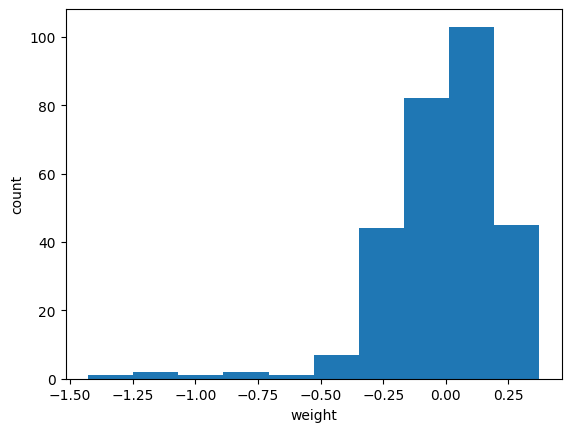

In [52]:
# 그림으로 표현
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

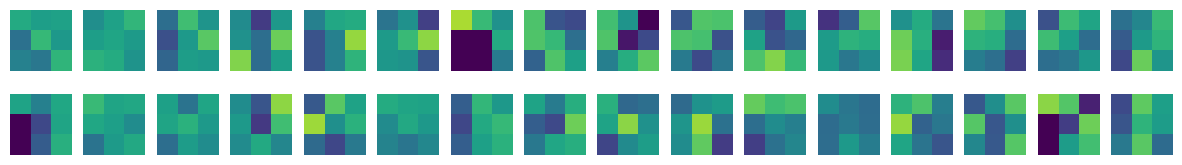

In [53]:
# 이번에는 32개의 커널을 16개씩 두줄에 표현해보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [54]:
# 훈련하지 않은 빈 합성곱만들어보기
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28,28,1)))
# 첫번째 층의 가중치를 no_training_conv변수에 저장하기
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [55]:
# 평균과 표준편차 구해보기
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.004812617 0.08099773


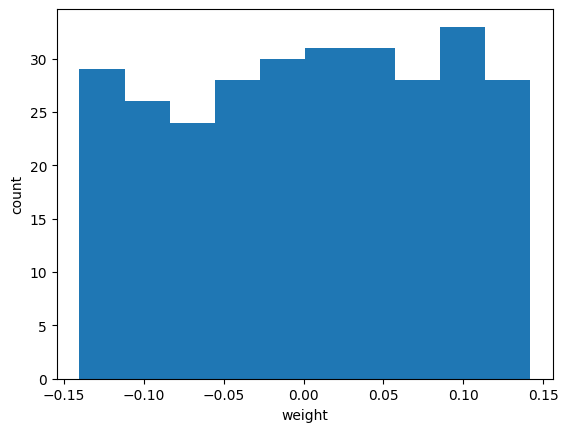

In [56]:
#히스토그램으로 그려보기
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

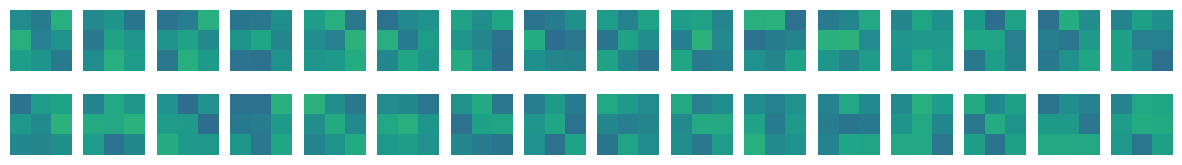

In [57]:
# 32개 그림으로 표현해보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
# 함수형 API 사용해보기
# 지금까지는 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용해서 만들었다. 이 모델은 순서대로 층을 쌓아 모델을 만든다.
# 하지만 입력이 2개 혹은 출력이 2개일 수 도 있기에 이런경우에는 Sequential 클래스를 사용하기 어렵다.
# 대신에 함수형 API를 사용해보자.

In [58]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [59]:
# input -> hidden -> outputs -> model(inputs, outputs)으로 이어진다.
inputs= keras.Input(shape=(784,))

hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

In [60]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [64]:
conv_acti = keras.Model(model.input, model.layers[0].output)
print(conv_acti)

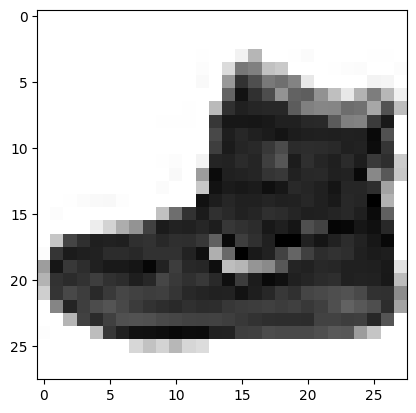

In [62]:
# 특성맵 시각화
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [32]:
# predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대한다.
# 하나의 샘플을 전달하더라도 꼭 첫번째 차원을 유지해야한다. 이를 위해서 슬라이싱 연산자를 이용해 첫번째 샘플을 선택하고 784, 크기를 28,28,1 크기로 변경하고 255로 나누어준다.(전처리과정)


In [65]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

NameError: name 'Conv2D' is not defined

In [ ]:
print(feature_maps.shape)

In [66]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_7" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 1)
